# ANOVA

In [1]:
cd data

c:\Users\qotnd\OneDrive\바탕 화면\ADP\통계\data


In [28]:
import pandas as pd
subway = pd.read_csv("subway.csv", encoding = "cp949", index_col = 0)

### 전처리

In [29]:
pd.set_option("display.max_row", 100)
subway

,사용월,호선명,지하철역,승객수
0,202306,1호선,동대문,691929
1,202306,1호선,동묘앞,606251
2,202306,1호선,서울역,3054194
3,202306,1호선,시청,1486497
4,202306,1호선,신설동,797907
...,...,...,...,...
89,202304,3호선,종로3가,649693
90,202304,3호선,지축,369701
91,202304,3호선,충무로,49
92,202304,3호선,학여울,150766


In [30]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 93
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     282 non-null    int64 
 1   호선명     282 non-null    object
 2   지하철역    282 non-null    object
 3   승객수     282 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.0+ KB


**해야할 것**
1. 새로운 month 컬럼 생성

In [42]:
subway["month"] = subway["사용월"].map(lambda x:str(x)[4:])

In [43]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 93
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     282 non-null    int64 
 1   호선명     282 non-null    object
 2   지하철역    282 non-null    object
 3   승객수     282 non-null    int64 
 4   month   282 non-null    object
dtypes: int64(2), object(3)
memory usage: 13.2+ KB


In [46]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282 entries, 0 to 93
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     282 non-null    int64 
 1   호선명     282 non-null    object
 2   지하철역    282 non-null    object
 3   승객수     282 non-null    int64 
 4   month   282 non-null    object
dtypes: int64(2), object(3)
memory usage: 13.2+ KB


### 문제 1
1. 월별, 호선별 두 독립변수에 대한 정규성과 등분산성을 만족하는지 확인하라.

##### 정규성 검정
- H0(귀무가설) : 정규성을 만족한다.
- H1(대립가설) : 정규성을 만족하지 않는다.

In [47]:
### 월별
# 몇개의 월이 있는지.
subway["month"].value_counts()

month
06    94
05    94
04    94
Name: count, dtype: int64

In [50]:
april = subway.loc[subway["month"]=="04"]["승객수"]
may = subway.loc[subway["month"]=="05"]["승객수"]
june = subway.loc[subway["month"] =="06"]["승객수"]

In [54]:
import scipy.stats as stats
print("april의 정규성 검정 : ", stats.shapiro(april))
print("may의 정규성 검정 : ", stats.shapiro(may))
print("june의 정규성 검정 : ", stats.shapiro(june))

april의 정규성 검정 :  ShapiroResult(statistic=0.9003708958625793, pvalue=2.7476385184854735e-06)
may의 정규성 검정 :  ShapiroResult(statistic=0.9023794531822205, pvalue=3.3991673262789845e-06)
june의 정규성 검정 :  ShapiroResult(statistic=0.8993760347366333, pvalue=2.474935854479554e-06)


모두 p-value가 0.05보다 작으니 유의수준 0.05하에서 귀무가설을 기각한다. 띠리서 정규성을 만족하지 않는다.

(array([16., 25., 18., 13.,  8.,  4.,  7.,  0.,  1.,  2.]),
 array([4.9000000e+01, 4.7322450e+05, 9.4640000e+05, 1.4195755e+06,
        1.8927510e+06, 2.3659265e+06, 2.8391020e+06, 3.3122775e+06,
        3.7854530e+06, 4.2586285e+06, 4.7318040e+06]),
 <BarContainer object of 10 artists>)

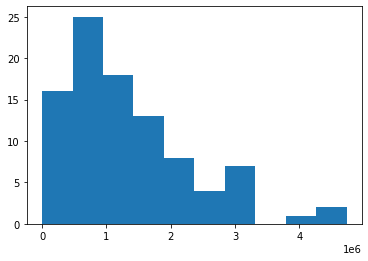

In [55]:
import matplotlib.pyplot as plt
plt.hist(april)

In [56]:
## 호선
subway["호선명"].value_counts()

호선명
2호선    150
3호선    102
1호선     30
Name: count, dtype: int64

In [58]:
line1 = subway.loc[subway["호선명"]=="1호선"]["승객수"]
line2 = subway.loc[subway["호선명"]=="2호선"]["승객수"]
line3 = subway.loc[subway["호선명"]=="3호선"]["승객수"]

In [59]:
print(stats.shapiro(line1))
print(stats.shapiro(line2))
print(stats.shapiro(line3))

ShapiroResult(statistic=0.8640193343162537, pvalue=0.0012365566799417138)
ShapiroResult(statistic=0.9226744771003723, pvalue=3.170428328758135e-07)
ShapiroResult(statistic=0.8860750794410706, pvalue=2.6614978310135484e-07)


모두 정규성을 만족하지 않는다.

##### 등분산성

- H0(귀무가설) : 집단간 분산은 동일하다.
- H1(대립가설) : 집단간 분산은 동일하지 않다.

In [60]:
### 월별
stats.levene(april, may, june)

LeveneResult(statistic=0.00974518466996433, pvalue=0.9903024828420797)

In [62]:
### 호선별
stats.levene(line1, line2, line3)

LeveneResult(statistic=10.40391714967012, pvalue=4.387236352895931e-05)

월별은 유의수준이 0.05보다 크므로 0.05 유의수준 하에서 귀무가설을 채택하여 분산이 동일하다고 볼 수 있지만, 호선별은 유의수준이 0.05보다 작아 귀무가설을 기각하여 집단간 분산이 동일하다고 볼 수 없다.

### 문제 2
2. 두 독립변수 모두 정규성을 만족하지 않는다고 가정하고 집단 간 평균에 차이가 존재하는지 확인하라.

**월별 가정**
- 귀무가설(H0) : 월별 승객수 평균에는 차이가 없다.
- 대립가설(H1) : 월별 승객수 평균에는 차이가 있다.

In [63]:
### 월별
stats.kruskal(april, may, june)

KruskalResult(statistic=0.10765787886691669, pvalue=0.947594188637232)

p-value가 0.05보다 크므로 유의수준 0.05하에서 귀무가설을 기각하지 않는다. 따라서 월별 승객수 평균에는 차이가 없다.

**호선별 가정**
- 귀무가설(H0) : 호선별 승객수 평균에는 차이가 없다.
- 대립가설(H1) : 호선별 승객 수 평균에는 차이가 있다.

In [64]:
stats.kruskal(line1, line2, line3)

KruskalResult(statistic=34.938348436134106, pvalue=2.5896080336130835e-08)

p-value가 0.05보다 작으므로 유의수준 0.05하에서 귀무가설을 기각한다. 따라서 호선별 승객수 평균에는 차이가 있다.

### 문제 3
1. 호선명 독립변수가 정규성을 만족하되 등분산성을 만족하지 않는다고 가정하고 호선별 평균에 차이가 존재하는지 확인하라.

- 귀무가설(H0) : 호선별 승객수 평균은 동일하다.
- 대립가설(H1) : 호선별 승객수 평균은 동일하지 않다.

In [66]:
import pingouin as pg

In [68]:
pg.welch_anova(dv = "승객수", between = "호선명", data = subway)

,Source,ddof1,ddof2,F,p-unc,np2
0,호선명,2,87.178677,22.136598,1.680962e-08,0.115099


p-value(p-unc)가 0.05보다 작으므로 귀무가설을 기각한다. 즉 호선별 승객수는 동일하지 않다.

### 문제 3
- 두 독립변수가 모두 정규성과 등분산성을 만족한다고 가정하고 아래 지시를 따르라.

4-1. 교호작용 효과를 검정하라.

4-2. 주효과 검정을 시행하라.

- 귀무가설1(H0) : 호선명 변수와 월별 변수의 상호작용 효과가 없다.
- 귀무가설2(H0) : 호선별 승객수 평균에는 차이가 없다.
- 귀무가설3(H0) : 월별 승객 수 평균에는 차이가 없다.
- 대립가설1(H1) : 호선명 변수와 월별 변수의 상호작용 효과가 있다.
- 대립가설2(H1) : 호선별 승객수 평균에는 차이가 있다.
- 대립가설3(H1) : 월별 승객 수 평균에는 차이가 있다.

In [70]:
subway.columns

Index(['사용월', '호선명', '지하철역', '승객수', 'month'], dtype='object')

In [74]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = '승객수~ C(호선명)+C(month)+C(호선명):C(month)'
model = ols(formula, subway).fit()
aov_table = anova_lm(model)

In [75]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(호선명),2.0,3.237973e+13,1.618987e+13,17.758881,5.616396e-08
C(month),2.0,5.652276e+10,2.826138e+10,0.031000,9.694787e-01
C(호선명):C(month),4.0,3.341967e+09,8.354917e+08,0.000916,9.999983e-01
Residual,273.0,2.488802e+14,9.116490e+11,NaN,NaN


- 호선명과 월별 상호작용 효과에 대한 결과 p-value가 9.999983e-01로 0.05보다 크므로 귀무가설을 기각하지 않는다. 따라서 호선명변수와 월별 변수간에는 교호작용이 존재하지 않는다. **두 변수가 교호작용이 존재하지 않으므로 아래 주효과검정이 의미를 갖는다.**
- 호선명 변수를 확인한 결과 유의확률이 5.616396e-08로 0.05보다 작므므로 유의수준 0.05하에서 귀무가설을 기각하여 호선별 승객수에는 차이가 있음을 알 수 있다.
- 월별 변수를 확인한 결과 유의확률이 9.694787e-01로 유의수준0.05보다 크므로 귀무가설이 기각되지 않는다. 따라서 월별에 따라 승객수에는 차이가 없다.
